### Importar CSV de treino

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pickle

df = pd.read_csv("../../../Files/df_to_train.csv")
df['Total_Review'] = df['Total_Review'].fillna('')
df.head(5)

,Total_Review,review_type
0,Location excellent rooms extremely comfortable...,positive
1,comfortable bed excellent air con great locati...,positive
2,views,positive
3,Clean comfortable room Kettle selection tea ba...,positive
4,Beds comfy staff lovely food amazing room spac...,positive


#### Criar objeto CountVectorizer

In [2]:
vect = CountVectorizer(max_features=5000, ngram_range=(1, 1))
vect.fit(df.Total_Review)

with open('count_vectorizer_gb.pkl', 'wb') as f:
    pickle.dump(vect, f)

text_vect = vect.transform(df.Total_Review)

Mapear os valores para numéricos e dividir os dados em conjunto de treinamento e teste


In [3]:
X = text_vect
y = df['review_type']
y = y.map({'positive': 1, 'neutral': 0, 'negative': -1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Instanciar Modelo Gradient Boosting

In [4]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

Treino

In [5]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

Teste

In [6]:
y_pred = gbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7484853192480969


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.85      0.75      2112
           0       0.76      0.58      0.66      2157
           1       0.83      0.81      0.82      2168

    accuracy                           0.75      6437
   macro avg       0.76      0.75      0.75      6437
weighted avg       0.76      0.75      0.75      6437



Matriz de confusão

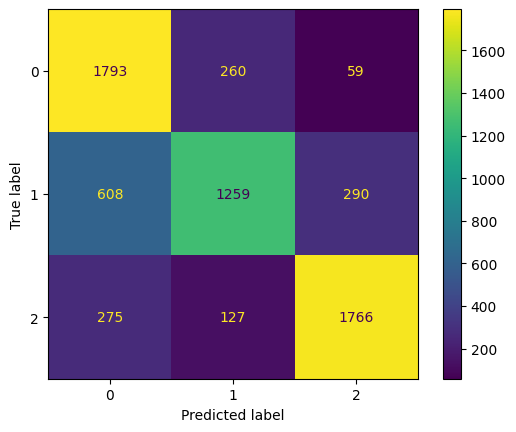

In [8]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()